In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
df = pd.read_csv('/content/drive/MyDrive/train.csv')
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.shape

(614, 13)

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Now we should delete the missing value for that we have to specified  the data type of each  column

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [31]:
columns_car=[ 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed',  'Property_Area', 'Loan_Status']
for column in columns_car :
   df[column].fillna(df[column].mode()[0], inplace= True)
columns_flaot=[ 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']
for column in columns_flaot :
   df[column].fillna(df[column].median(), inplace= True)


In [ ]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# it the time to do some analyse!

In [ ]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [ ]:
df['Loan_Status'].value_counts(normalize = True )

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

Now, we have obtained the percentage of the loan that the bank had granted from the first lock-in, we can recognise that the bank has a tendency to grant loans.

In [ ]:
df['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

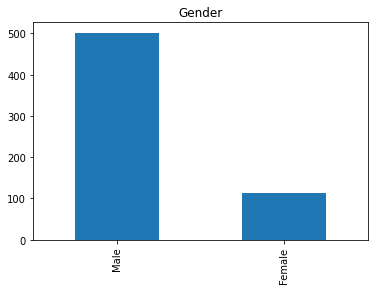

In [ ]:
df['Gender'].value_counts().plot.bar(title='Gender')

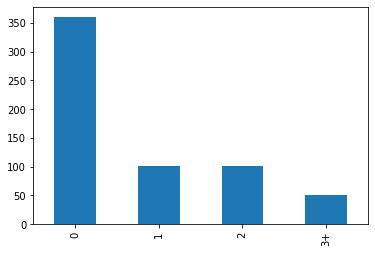

In [ ]:
df['Dependents'].value_counts().plot.bar()

In [ ]:
df[columns_flaot].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.465798,342.410423,0.855049
std,6109.041673,2926.248369,84.180967,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,125.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


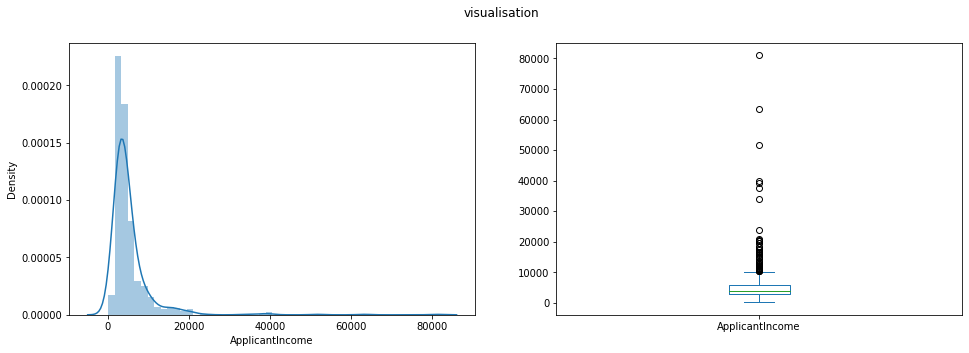

In [12]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['ApplicantIncome'])
plt.subplot(122)
df['ApplicantIncome'].plot.box(figsize=(16,5))
plt.suptitle('visualisation')
plt.show()

#analyse bivariee

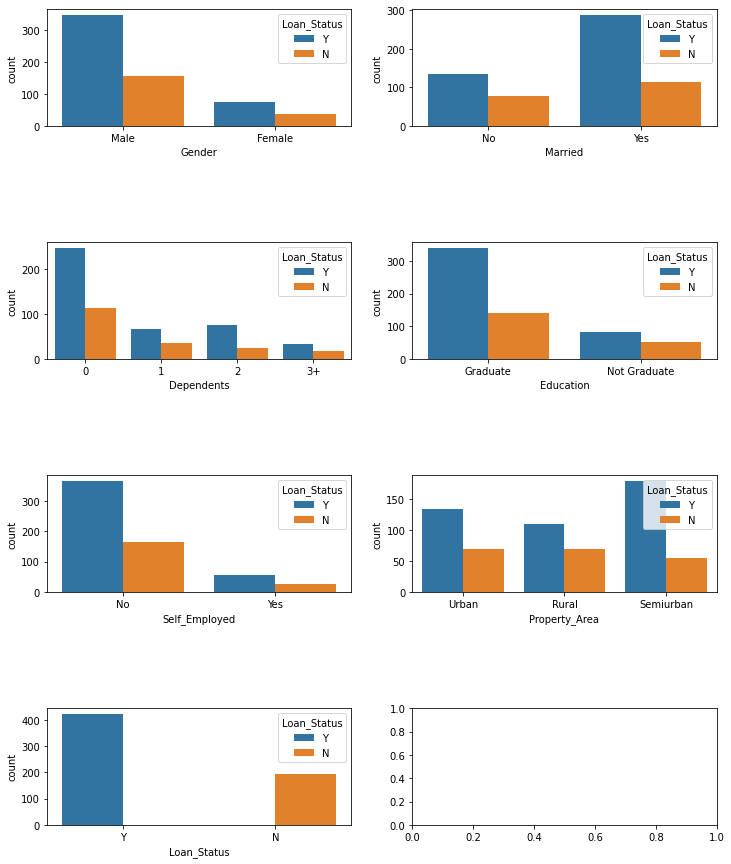

In [22]:
fig, axes = plt.subplots(4,2,figsize = (12,15))

for idx,cat_col  in enumerate(columns_car) :
  row, col  = idx//2,idx%2
  sns.countplot(x=cat_col,data=df,hue='Loan_Status', ax = axes[row, col])
plt.subplots_adjust(hspace=1)
   

In [24]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565181,-0.046531,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059383,0.011134
LoanAmount,0.565181,0.189218,1.000000,0.036960,-0.000607
Loan_Amount_Term,-0.046531,-0.059383,0.036960,1.000000,-0.004705
Credit_History,-0.018615,0.011134,-0.000607,-0.004705,1.000000


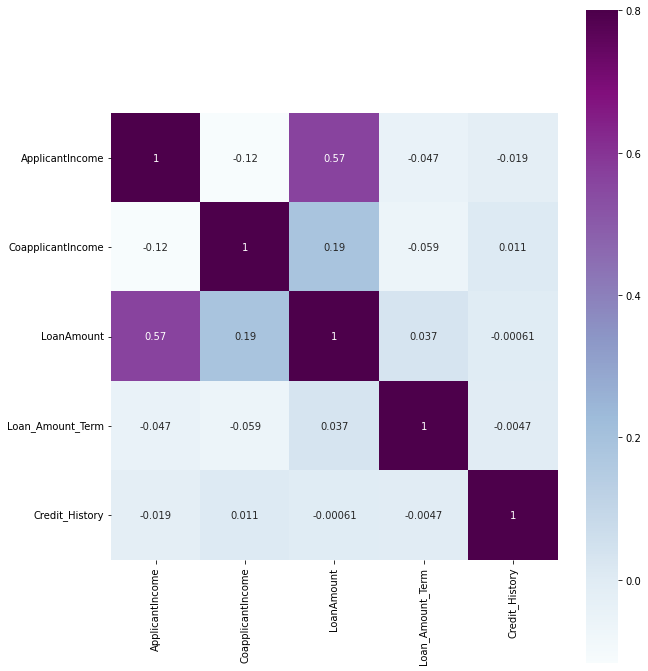

In [23]:
matrix = df.corr()
f,ax = plt.subplots(figsize=(10,12))
sns.heatmap(matrix,vmax=.8,square=True,cmap='BuPu',annot=True)



#

In [32]:
df_cat = df[columns_car]
df_cat

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,Y
610,Male,Yes,3+,Graduate,No,Rural,Y
611,Male,Yes,1,Graduate,No,Urban,Y
612,Male,Yes,2,Graduate,No,Urban,Y


In [33]:
df_cat = pd.get_dummies(df_cat,drop_first=True)
df_cat

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,1,0,0,0,0,0,0,0,1,1
1,1,1,1,0,0,0,0,0,0,0
2,1,1,0,0,0,0,1,0,1,1
3,1,1,0,0,0,1,0,0,1,1
4,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,0,0,0,1
610,1,1,0,0,1,0,0,0,0,1
611,1,1,1,0,0,0,0,0,1,1
612,1,1,0,1,0,0,0,0,1,1


In [34]:
df_num = df[columns_flaot]
df_num

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,128.0,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


In [36]:
df_encoded = pd.concat([df_cat, df_num], axis=1)
df_encoded

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,0,0,0,0,0,1,1,5849,0.0,128.0,360.0,1.0
1,1,1,1,0,0,0,0,0,0,0,4583,1508.0,128.0,360.0,1.0
2,1,1,0,0,0,0,1,0,1,1,3000,0.0,66.0,360.0,1.0
3,1,1,0,0,0,1,0,0,1,1,2583,2358.0,120.0,360.0,1.0
4,1,0,0,0,0,0,0,0,1,1,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,0,0,0,1,2900,0.0,71.0,360.0,1.0
610,1,1,0,0,1,0,0,0,0,1,4106,0.0,40.0,180.0,1.0
611,1,1,1,0,0,0,0,0,1,1,8072,240.0,253.0,360.0,1.0
612,1,1,0,1,0,0,0,0,1,1,7583,0.0,187.0,360.0,1.0


In [37]:
Y= df_encoded['Loan_Status_Y']


In [43]:
X= df_encoded.drop('Loan_Status_Y', axis=1)

In [69]:
X

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,0,0,0,0,0,1,5849,0.0,128.0,360.0,1.0
1,1,1,1,0,0,0,0,0,0,4583,1508.0,128.0,360.0,1.0
2,1,1,0,0,0,0,1,0,1,3000,0.0,66.0,360.0,1.0
3,1,1,0,0,0,1,0,0,1,2583,2358.0,120.0,360.0,1.0
4,1,0,0,0,0,0,0,0,1,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,0,0,0,2900,0.0,71.0,360.0,1.0
610,1,1,0,0,1,0,0,0,0,4106,0.0,40.0,180.0,1.0
611,1,1,1,0,0,0,0,0,1,8072,240.0,253.0,360.0,1.0
612,1,1,0,1,0,0,0,0,1,7583,0.0,187.0,360.0,1.0


# the testing part and the traning part

In [60]:
x_train,x_test, y_train, y_test = train_test_split(X,y, test_size=0.15,random_state=6)


In [61]:
#instaNCE THE MODEL
clf = LogisticRegression()
# training the model
clf.fit(x_train,y_train)

LogisticRegression()

In [62]:
pred = clf.predict(x_test)
pred

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1], dtype=uint8)

In [63]:
accuracy_score(y_test, pred)

0.8494623655913979

In [64]:
X.columns

Index(['Gender_Male', 'Married_Yes', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
       'Credit_History'],
      dtype='object')

#predection for a new client !

In [68]:
new_client_data = [[1,0,0,0,0,0,1,1,0,200,0,2000,1,360]]
clf.predict( new_client_data)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([1], dtype=uint8)